In [7]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.path.expanduser('~/.kaggle')




In [8]:
!kaggle datasets list


ref                                                       title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
sahilislam007/college-student-placement-factors-dataset   College Student Placement Factors Dataset               110450  2025-07-02 08:33:50.547000           6430        136  1.0              
abdulmalik1518/cars-datasets-2025                         Cars Datasets (2025)                                     25987  2025-07-17 21:43:28.493000           2909         70  1.0              
urvishahir/electric-vehicle-specifications-dataset-2025   Electric Vehicle Specs Dataset (2025)🔋🚗                  16631  2025-06-20 07:14:56.777000          10369        251  1.0              
divyaraj2006/social-media-enga

In [9]:
import os
import zipfile
import requests
import pandas as pd
from bs4 import BeautifulSoup

# For Kaggle API
import kaggle

# Set correct Kaggle config path
os.environ['KAGGLE_CONFIG_DIR'] = os.path.expanduser('~/.kaggle')

# For ISIC API
import json


from PIL import Image
import matplotlib.pyplot as plt



In [10]:
import os
from zipfile import ZipFile

# Make sure Kaggle config is set
os.environ['KAGGLE_CONFIG_DIR'] = os.path.expanduser('~/.kaggle')

def dataset_download(dataset_name, target_dir="./data"):
    os.makedirs(target_dir, exist_ok=True)
    zip_path = os.path.join(target_dir, dataset_name.split("/")[-1] + ".zip")

    # Download dataset from Kaggle
    !kaggle datasets download -d {dataset_name} -p {target_dir} --force

    # Unzip the downloaded file
    with ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(target_dir)

    return os.path.abspath(target_dir)


In [11]:
# Download Skin Burn Dataset (shubhambaid)
burn_path = dataset_download("shubhambaid/skin-burn-dataset")
print("Burn Dataset path:", burn_path)

# Download Alternative Skin Burn Dataset (faresabbasai2022)
alt_burn_path = dataset_download("faresabbasai2022/skin-burn-dataset")
print("Alt Burn Dataset path:", alt_burn_path)

# Download Wound Classification Dataset (ibrahimfateen)
wound_path = dataset_download("ibrahimfateen/wound-classification")
print("Wound Dataset path:", wound_path)


Dataset URL: https://www.kaggle.com/datasets/shubhambaid/skin-burn-dataset
License(s): CC0-1.0
  0%|                                               | 0.00/16.6M [00:00<?, ?B/s]
100%|██████████████████████████████████████| 16.6M/16.6M [00:00<00:00, 1.39GB/s]
Burn Dataset path: /home/yeblad/Desktop/MedCapstone/mscap/data
Dataset URL: https://www.kaggle.com/datasets/faresabbasai2022/skin-burn-dataset
License(s): apache-2.0
  0%|                                                | 0.00/109M [00:00<?, ?B/s]
100%|████████████████████████████████████████| 109M/109M [00:00<00:00, 1.75GB/s]
Alt Burn Dataset path: /home/yeblad/Desktop/MedCapstone/mscap/data
Dataset URL: https://www.kaggle.com/datasets/ibrahimfateen/wound-classification
License(s): unknown
  0%|                                               | 0.00/89.8M [00:00<?, ?B/s]
100%|██████████████████████████████████████| 89.8M/89.8M [00:00<00:00, 1.75GB/s]
Wound Dataset path: /home/yeblad/Desktop/MedCapstone/mscap/data


In [12]:

def summarize_dataset(folder):
    image_exts = ('.jpg', '.jpeg', '.png')
    image_count = 0
    subfolders = set()
    sample_images = []
    for root, dirs, files in os.walk(folder):
        for f in files:
            if f.lower().endswith(image_exts):
                image_count += 1
                subfolders.add(os.path.relpath(root, folder))
                # Save up to 3 sample file paths
                if len(sample_images) < 3:
                    sample_images.append(os.path.relpath(os.path.join(root, f), folder))
    print(f"Dataset: {folder}")
    print(f"  Number of images: {image_count}")
    print(f"  Number of subfolders: {len(subfolders)}")
    print(f"  Subfolders: {list(subfolders)[:5]}{' ...' if len(subfolders) > 5 else ''}")
    print(f"  Example image files: {sample_images}")
    print("")

# Example usage:
summarize_dataset(burn_path)
summarize_dataset(alt_burn_path)
summarize_dataset(wound_path)


Dataset: /home/yeblad/Desktop/MedCapstone/mscap/data
  Number of images: 10266
  Number of subfolders: 18
  Subfolders: ['Wound_dataset copy/Bruises', 'Wound_dataset copy/Surgical Wounds', 'Wound_dataset copy/Normal', 'Wound_dataset copy/Pressure Wounds', 'Wound_dataset copy/Laseration'] ...
  Example image files: ['img1060.jpg', 'img479.jpg', 'img764.jpg']

Dataset: /home/yeblad/Desktop/MedCapstone/mscap/data
  Number of images: 10266
  Number of subfolders: 18
  Subfolders: ['Wound_dataset copy/Bruises', 'Wound_dataset copy/Surgical Wounds', 'Wound_dataset copy/Normal', 'Wound_dataset copy/Pressure Wounds', 'Wound_dataset copy/Laseration'] ...
  Example image files: ['img1060.jpg', 'img479.jpg', 'img764.jpg']

Dataset: /home/yeblad/Desktop/MedCapstone/mscap/data
  Number of images: 10266
  Number of subfolders: 18
  Subfolders: ['Wound_dataset copy/Bruises', 'Wound_dataset copy/Surgical Wounds', 'Wound_dataset copy/Normal', 'Wound_dataset copy/Pressure Wounds', 'Wound_dataset copy/La

Burn Dataset:


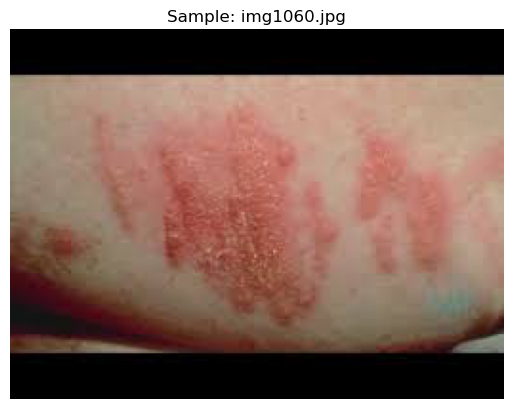

Alt Burn Dataset:


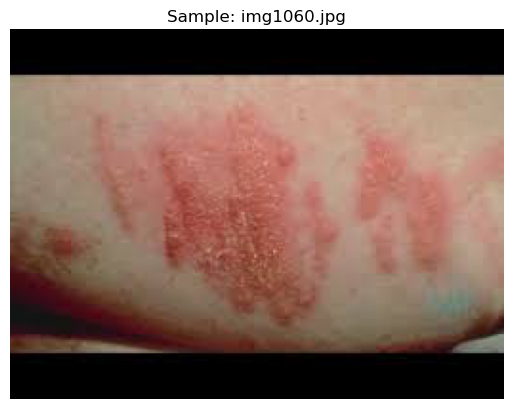

Wound Dataset:


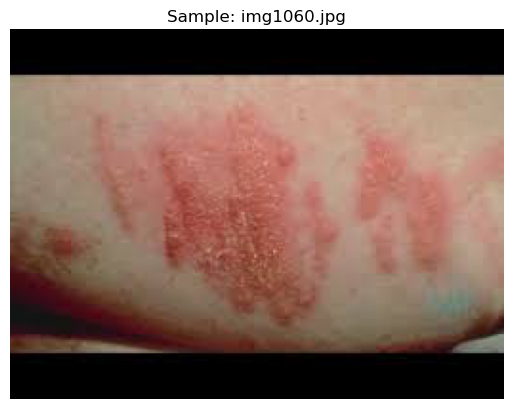

In [13]:
def show_sample_image(folder):
    # Walk through all subdirectories to find an image
    for root, dirs, files in os.walk(folder):
        for f in files:
            if f.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(root, f)
                img = Image.open(img_path)
                plt.imshow(img)
                plt.axis("off")
                plt.title(f"Sample: {f}")
                plt.show()
                return
    print(f"No images found in {folder} or its subfolders.")

print("Burn Dataset:")
show_sample_image(burn_path)

print("Alt Burn Dataset:")
show_sample_image(alt_burn_path)

print("Wound Dataset:")
show_sample_image(wound_path)


In [14]:
def list_images(folder, n=10):
    found = 0
    print(f"First {n} images in '{folder}' (including subfolders):")
    # Walk through all subdirectories and list image files
    for root, dirs, files in os.walk(folder):
        for f in files:
            if f.lower().endswith(('.jpg', '.jpeg', '.png')):
                print(os.path.relpath(os.path.join(root, f), folder))
                found += 1
                if found >= n:
                    return
    if found == 0:
        print("No image files found.")

# Example usage:
list_images(burn_path)
list_images(alt_burn_path)
list_images(wound_path)


First 10 images in '/home/yeblad/Desktop/MedCapstone/mscap/data' (including subfolders):
img1060.jpg
img479.jpg
img764.jpg
img1427.jpg
img33.jpg
img305.jpg
img467.jpg
img949.jpg
img452.jpg
img1205.jpg
First 10 images in '/home/yeblad/Desktop/MedCapstone/mscap/data' (including subfolders):
img1060.jpg
img479.jpg
img764.jpg
img1427.jpg
img33.jpg
img305.jpg
img467.jpg
img949.jpg
img452.jpg
img1205.jpg
First 10 images in '/home/yeblad/Desktop/MedCapstone/mscap/data' (including subfolders):
img1060.jpg
img479.jpg
img764.jpg
img1427.jpg
img33.jpg
img305.jpg
img467.jpg
img949.jpg
img452.jpg
img1205.jpg


In [15]:
def list_all_subfolders(folder):
    subfolders = set()
    for root, dirs, files in os.walk(folder):
        # Skip the root folder itself, only add subfolders
        if root != folder:
            rel_path = os.path.relpath(root, folder)
            subfolders.add(rel_path)
    print(f"Subfolders in {folder}:")
    for sf in sorted(subfolders):
        print("  -", sf)
    print(f"Total: {len(subfolders)} subfolders\n")

# List all subfolders for each dataset:
list_all_subfolders(burn_path)
list_all_subfolders(alt_burn_path)
list_all_subfolders(wound_path)


Subfolders in /home/yeblad/Desktop/MedCapstone/mscap/data:
  - Wound_dataset copy
  - Wound_dataset copy/Abrasions
  - Wound_dataset copy/Bruises
  - Wound_dataset copy/Burns
  - Wound_dataset copy/Cut
  - Wound_dataset copy/Diabetic Wounds
  - Wound_dataset copy/Laseration
  - Wound_dataset copy/Normal
  - Wound_dataset copy/Pressure Wounds
  - Wound_dataset copy/Surgical Wounds
  - Wound_dataset copy/Venous Wounds
  - skin burn dataset
  - skin burn dataset/test
  - skin burn dataset/train
  - skin burn dataset/train/1st degree burn
  - skin burn dataset/train/2nd degree burn
  - skin burn dataset/train/3nd degree burn
  - skin burn dataset/valid
  - skin burn dataset/valid/1st degree burn
  - skin burn dataset/valid/2nd degree burn
  - skin burn dataset/valid/3nd degree burn
Total: 21 subfolders

Subfolders in /home/yeblad/Desktop/MedCapstone/mscap/data:
  - Wound_dataset copy
  - Wound_dataset copy/Abrasions
  - Wound_dataset copy/Bruises
  - Wound_dataset copy/Burns
  - Wound_data

In [16]:

train_root = os.path.join(alt_burn_path, "skin burn dataset", "train")
valid_root = os.path.join(alt_burn_path, "skin burn dataset", "valid")

def collect_burn_images(root_folder):
    data_1and2 = []
    data_3 = []
    for degree_folder in os.listdir(root_folder):
        full_path = os.path.join(root_folder, degree_folder)
        if not os.path.isdir(full_path):
            continue
        if "1st" in degree_folder or "2nd" in degree_folder:
            label = "1_and_2_degree"
            target_list = data_1and2
        elif "3nd" in degree_folder or "3rd" in degree_folder:
            label = "3rd_degree"
            target_list = data_3
        else:
            continue
        for f in os.listdir(full_path):
            if f.lower().endswith(('.jpg', '.jpeg', '.png')):
                target_list.append({"filepath": os.path.join(full_path, f), "label": label})
    return data_1and2, data_3

train_1and2, train_3 = collect_burn_images(train_root)
valid_1and2, valid_3 = collect_burn_images(valid_root)

df_1and2 = pd.DataFrame(train_1and2 + valid_1and2)
df_3 = pd.DataFrame(train_3 + valid_3)

In [17]:
generic_burn_files = [f for f in os.listdir(burn_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
df_generic = pd.DataFrame([{"filepath": os.path.join(burn_path, f), "label": "burn_unknown_degree"} for f in generic_burn_files])

In [18]:
df_1and2.to_csv("burns_1and2.csv", index=False)
df_3.to_csv("burns_3rd.csv", index=False)
df_generic.to_csv("burns_unknown_degree.csv", index=False)

print("Saved files:")
print("  burns_1and2.csv:", len(df_1and2), "images")
print("  burns_3rd.csv:", len(df_3), "images")
print("  burns_unknown_degree.csv:", len(df_generic), "images")

Saved files:
  burns_1and2.csv: 4876 images
  burns_3rd.csv: 1023 images
  burns_unknown_degree.csv: 1227 images


In [19]:
# Load your expanded, labeled burns data
df_burns = pd.read_csv("burns_dataset_expanded.csv")

In [20]:
# Add a 'label' column for burn categories
df_burns['label'] = df_burns['binary_label'].map({0: "burn_1and2", 1: "burn_3rd"})


In [21]:
import kagglehub

def collect_wound_images(wound_root):
    data = []
    for category_folder in os.listdir(wound_root):
        full_path = os.path.join(wound_root, category_folder)
        if not os.path.isdir(full_path):
            continue
        label = f"wound_{category_folder.replace(' ', '_').lower()}"  # e.g. 'wound_abrasions'
        for f in os.listdir(full_path):
            if f.lower().endswith(('.jpg', '.jpeg', '.png')):
                data.append({"filepath": os.path.join(full_path, f), "label": label})
    return pd.DataFrame(data)

# This is the actual path after unzip
wound_root = "./wound-data/Wound_dataset copy"

# Optional kagglehub note (not needed since you manually downloaded and extracted)
# import kagglehub
# path = kagglehub.model_download("ibrahimfateen/wound-classification/8")
# print("Dataset downloaded to:", path)

df_wounds = collect_wound_images(wound_root)
df_wounds.to_csv("wounds.csv", index=False)
print("Saved wounds.csv:", len(df_wounds), "images")


Saved wounds.csv: 2940 images


In [26]:


#def collect_wound_images(wound_root):
#    data = []
#    for category_folder in os.listdir(wound_root):
#        full_path = os.path.join(wound_root, category_folder)
#        if not os.path.isdir(full_path):
#            continue
#        label = f"wound_{category_folder.replace(' ', '_').lower()}"  # e.g. 'wound_abrasions'
#        for f in os.listdir(full_path):
#            if f.lower().endswith(('.jpg', '.jpeg', '.png')):
#                data.append({"filepath": os.path.join(full_path, f), "label": label})
#    return pd.DataFrame(data)


#path = kagglehub.model_download("ibrahimfateen/wound-classification/8")
#print("Dataset downloaded to:", path)


#wound_root = r"C:\Users\dabne\.cache\kagglehub\datasets\ibrahimfateen\wound-classification\versions\8\Wound_dataset copy"
#df_wounds = collect_wound_images(wound_root)
#df_wounds.to_csv("wounds.csv", index=False)
#print("Saved wounds.csv:", len(df_wounds), "images")


In [27]:
# Both DataFrames should now have ['filepath', 'label']
df_all = pd.concat([df_burns[['filepath', 'label']], df_wounds[['filepath', 'label']]], ignore_index=True)

# If you have rashes or other datasets, load and add them in the same way

print(df_all['label'].value_counts())
df_all.to_csv("urgent_care_images_master.csv", index=False)
print("Saved urgent_care_images_master.csv:", len(df_all), "total images")


label
burn_1and2               4876
burn_3rd                 1289
wound_pressure_wounds     602
wound_venous_wounds       494
wound_diabetic_wounds     462
wound_surgical_wounds     420
wound_bruises             242
wound_normal              200
wound_abrasions           164
wound_burns               134
wound_laseration          122
wound_cut                 100
Name: count, dtype: int64
Saved urgent_care_images_master.csv: 9105 total images


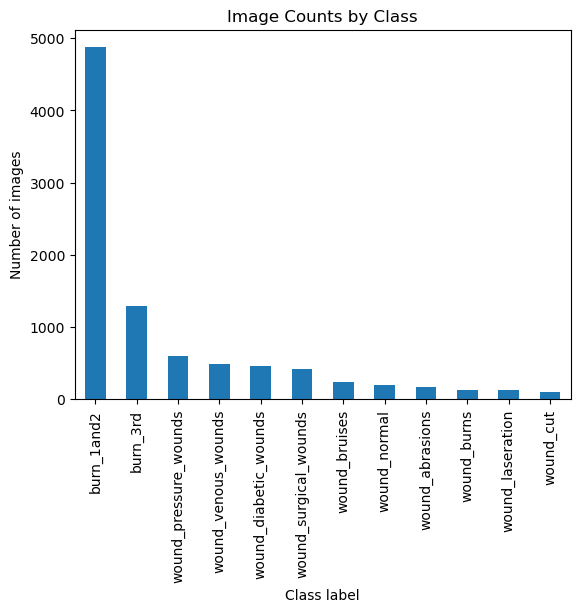

In [28]:
import matplotlib.pyplot as plt

df_all['label'].value_counts().plot(kind='bar', title="Image Counts by Class")
plt.xlabel("Class label")
plt.ylabel("Number of images")
plt.show()


In [29]:
# Remove all wound_burns images from the master dataset
df_all = pd.read_csv('urgent_care_images_master.csv')
before = len(df_all)
df_all = df_all[df_all['label'] != 'wound_burns'].copy()
after = len(df_all)
print(f"Removed {before - after} wound_burns images. Final dataset: {after} images.")
df_all.to_csv('urgent_care_images_master_no_wound_burns.csv', index=False)


Removed 134 wound_burns images. Final dataset: 8971 images.


In [32]:
import os
import pandas as pd

# Step 1: Download and unzip the dataset
!kaggle datasets download -d yasinpratomo/wound-dataset -p ./wound-data --unzip

# Step 2: Define function to collect image paths and labels
def collect_wound_images(wound_root):
    data = []
    for category_folder in os.listdir(wound_root):
        full_path = os.path.join(wound_root, category_folder)
        if not os.path.isdir(full_path):
            continue
        label = f"wound_{category_folder.replace(' ', '_').lower()}"
        for f in os.listdir(full_path):
            if f.lower().endswith(('.jpg', '.jpeg', '.png')):
                data.append({"filepath": os.path.join(full_path, f), "label": label})
    return pd.DataFrame(data)

# Step 3: Adjust this if needed depending on folder structure
wound_root = "./wound-data/Wound_Dataset"

# Step 4: Load DataFrame and save CSV
df_wounds = collect_wound_images(wound_root)
df_wounds.to_csv("wounds.csv", index=False)
print("Saved wounds.csv with", len(df_wounds), "images")



Dataset URL: https://www.kaggle.com/datasets/yasinpratomo/wound-dataset
License(s): unknown
  0%|                                               | 0.00/13.9M [00:00<?, ?B/s]
100%|██████████████████████████████████████| 13.9M/13.9M [00:00<00:00, 2.42GB/s]


FileNotFoundError: [Errno 2] No such file or directory: './wound-data/Wound_Dataset'

In [30]:



# Download latest version of the wound dataset from Kaggle
path = kagglehub.dataset_download("yasinpratomo/wound-dataset")

print("Path to dataset files:", path)


AttributeError: module 'kagglehub' has no attribute 'dataset_download'

In [22]:



wound_root = r"C:\Users\dabne\.cache\kagglehub\datasets\yasinpratomo\wound-dataset\versions\1\Wound_dataset"

data = []
for folder in os.listdir(wound_root):
    subfolder = os.path.join(wound_root, folder)
    if not os.path.isdir(subfolder):
        continue
    label = f"wound_{folder.lower()}"  # E.g., wound_abrasions
    files = [f for f in os.listdir(subfolder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    for f in files:
        data.append({"filepath": os.path.join(subfolder, f), "label": label})

df_yasin = pd.DataFrame(data)
print("Shape:", df_yasin.shape)
print("Labels:", df_yasin['label'].value_counts())
df_yasin.head()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dabne\\.cache\\kagglehub\\datasets\\yasinpratomo\\wound-dataset\\versions\\1\\Wound_dataset'

In [23]:
df_all = pd.read_csv("urgent_care_images_master_no_wound_burns.csv")
print("Old master shape:", df_all.shape)

df_combined = pd.concat([df_all, df_yasin], ignore_index=True)
print("New combined shape:", df_combined.shape)
print(df_combined['label'].value_counts())
df_combined.to_csv("urgent_care_images_master_plus_yasin.csv", index=False)
print("Saved as urgent_care_images_master_plus_yasin.csv")


Old master shape: (8971, 2)


NameError: name 'df_yasin' is not defined

In [24]:

# Remove classes you don't need
remove_labels = [
    "wound_burns",
    "wound_ingrown_nails",
    "wound_normal",
    "wound_surgical_wounds",
    # "wound_pressure_wounds", # uncomment to remove if desired
]
df = df[~df['label'].isin(remove_labels)]

# Standardize typo and merge stab/cut/laceration
def remap_label(label):
    if label in ["wound_laceration", "wound_laseration", "wound_stab_wound", "wound_cut"]:
        return "wound_laceration"
    # Optionally combine abrasions and bruises if low count:
    # if label in ["wound_abrasions", "wound_bruises"]:
    #     return "wound_superficial"
    return label

df['label'] = df['label'].apply(remap_label)

# Print final classes and their counts
print("Cleaned classes:\n", df['label'].value_counts())



NameError: name 'df' is not defined

In [25]:
# Save your final, cleaned, ready-to-train master dataset
df.to_csv("urgent_care_images_master_final.csv", index=False)
print("Saved as urgent_care_images_master_final.csv")
print("Final class distribution:\n", df['label'].value_counts())


NameError: name 'df' is not defined

In [26]:
!pip install kaggle --upgrade



In [27]:
import os
import json

# Upload kaggle.json manually if needed
  # skip if not using Colab
files.upload()

# Move it to the right place
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



NameError: name 'files' is not defined

In [ ]:
!kaggle datasets list



In [ ]:
import os
import re

with open("medcap.ipynb", "r") as f:
    nb_text = f.read()

# Extract common dataset file types
files = re.findall(r"[\'\"]([^\'\"\n]*\.(csv|xlsx|tsv|json))[\'\"]", nb_text)

# Show only unique paths
unique_files = sorted(set([f[0] for f in files]))
print("Files loaded in notebook:")
for file in unique_files:
    print(" -", file)


In [42]:
print(kagglehub.__version__)

0.3.12


In [43]:
!pip install kagglehub==0.1.4 --force-reinstall



  Using cached kagglehub-0.1.4-py3-none-any.whl.metadata (15 kB)
Using cached kagglehub-0.1.4-py3-none-any.whl (24 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.5.0
    Uninstalling urllib3-2.5.0:
      Successfully uninstalled urllib3-2.5.0
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.67.1
    Uninstalling tqdm-4.67.1:
      Successfully uninstalled tqdm-4.67.1
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: charset_normalizer
    Found existing installation: charset-normalizer 3.3.2
    Uninstalling charset-normalizer-3.3.2:
      Successfully uninstalled charset-normalizer-3.3.2
  Attempting uninstall: certifi
    Found existing installation: certifi 2025.7.14
    Uninstalling certifi-2025.7.14:
      Successfully uninstalled certifi-2025.7.14
  Attempting uninstall: requests
    Found existing installation: reques

In [1]:
import kagglehub
print(kagglehub.__version__)



0.1.4


In [4]:
!kaggle datasets download -d ibrahimfateen/wound-classification -p ./wound-data --unzip

Dataset URL: https://www.kaggle.com/datasets/ibrahimfateen/wound-classification
License(s): unknown
  0%|                                               | 0.00/89.8M [00:00<?, ?B/s]
100%|██████████████████████████████████████| 89.8M/89.8M [00:00<00:00, 3.51GB/s]


In [5]:
import os

wound_root = "./wound-data"
for root, dirs, files in os.walk(wound_root):
    print(f"\n📁 Directory: {root}")
    for d in dirs:
        print(f"   📂 {d}")
    for f in files[:5]:
        print(f"   📄 {f}")


📁 Directory: ./wound-data
   📂 Wound_dataset copy

📁 Directory: ./wound-data/Wound_dataset copy
   📂 Cut
   📂 Laseration
   📂 Surgical Wounds
   📂 Abrasions
   📂 Bruises
   📂 Normal
   📂 Burns
   📂 Venous Wounds
   📂 Pressure Wounds
   📂 Diabetic Wounds

📁 Directory: ./wound-data/Wound_dataset copy/Cut
   📄 mirrored_cut (17).jpg
   📄 mirrored_cut (47).jpg
   📄 cut (9).jpg
   📄 mirrored_cut (7).jpg
   📄 cut (27).jpg

📁 Directory: ./wound-data/Wound_dataset copy/Laseration
   📄 mirrored_laseration (25).jpg
   📄 laseration (32).jpg
   📄 laseration (55).jpg
   📄 mirrored_laseration (11).jpg
   📄 laseration (14).jpg

📁 Directory: ./wound-data/Wound_dataset copy/Surgical Wounds
   📄 mirrored_orthopaedic-wound-1-6.jpg
   📄 83_0.jpg
   📄 mirrored_17_1.jpg
   📄 mirrored_60_1.jpg
   📄 82_0.jpg

📁 Directory: ./wound-data/Wound_dataset copy/Abrasions
   📄 abrasions (54).jpg
   📄 abrasions (30).jpg
   📄 mirrored_abrasions (51).jpg
   📄 abrasions (81).jpg
   📄 abrasions (44).jpg

📁 Directory: ./wou